In [1]:
%run util.ipynb
from intcode import VM

In [2]:
prog = get_puzzle(17)

In [3]:
asci = VM(prog)
out = np.zeros(shape=(43,50))
for i in range(43):
    for j in range(50):
        out[i][j] = asci.run()

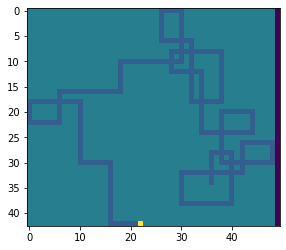

In [4]:
plt.imshow(out)

In [5]:
out = [o for o in VM(prog)]
print("".join(map(chr,out)))

..........................#####..................
..........................#...#..................
..........................#...#..................
..........................#...#..................
..........................#...#..................
..........................#...#..................
..........................#######................
..............................#.#................
............................###########..........
............................#.#.#.....#..........
..................#############.#.....#..........
..................#.........#...#.....#..........
..................#.........#######...#..........
..................#.............#.#...#..........
..................#.............#.#...#..........
..................#.............#.#...#..........
......#############.............#.#...#..........
......#.........................#.#...#..........
###########.....................#######..........
#.....#...#.......................#..............


In [6]:
len(out)

2151

In [7]:
arr = "".join(map(chr,out)).split('\n')[:-2]

In [8]:
pos = [P(1,0),P(0,1),P(-1,0),P(0,-1)]
s = 0
n = 0
for i in range(1,len(arr)-1):
    for j in range(1,len(arr[i])-1):
        if arr[i][j] != '#':
            continue
        p = P(i,j)
        cross = True
        for k in range(4):
            i2,j2 = p+pos[k]
            if arr[i2][j2] != '#':
                cross = False
                break
        if cross:
            s+= i*j
            n += 1
s

8928

# Part 2

In [9]:
dirs = [P(-1,0),P(0,-1),P(1,0), P(0,1)]
cur = 1
path = []
grid = defaultdict(int)
m = {
    '.': 0,
    '#': 1,
    '^': 0
}

for i in range(len(arr)):
    for j in range(len(arr[i])):
        grid[P(j,i)] = m[arr[i][j]]
        if arr[i][j] == '^':
            pos = P(j,i)            

l = sum(grid.values()) + n
i = 0
while i < l:
    if grid[pos+dirs[cur]]==1:
        pos = pos+dirs[cur]
        path[-1] += 1
        i+=1
    else:
        cur = (cur+1)%4
        if grid[pos+dirs[cur]]==1:
            path.append('R')
            path.append(0)
            continue
        else:
            path.append('L')
            path.append(0)
            cur = (cur+2)%4
        
    paint(grid, highlight=pos)

                                                   
                           █████                   
                           █   █                   
                           █   █                   
                           █   █                   
                           █   █                   
                           █   █                   
                           ███████                 
                               █ █                 
                             ███████████           
                             █ █ █     █           
                   █████████████ █     █           
                   █         █   █     █           
                   █         ███████   █           
                   █             █ █   █           
                   █             █ █   █           
                   █             █ █   █           
       █████████████             █ █   █           
       █                         █ █   █           
 ███████████

In [19]:
def to_ord(string):
    return list(map(ord,string))+[10]

A = 'L,10,L,10,L,4,L,6'
B = 'L,6,R,12,L,6'
C = 'R,12,L,10,L,4,L,6'
print(len(A), len(B), len(C))

main = ",".join(map(str,path)).replace(A, 'A').replace(B, 'B').replace(C,'C')
print(main)

main = to_ord(main)
A = to_ord(A)
B = to_ord(B)
C = to_ord(C)
show = to_ord('y')

17 12 17
B,C,B,C,B,A,C,A,B,A


In [20]:
from IPython import display

prog = '2'+prog[1:]
asci = VM(prog, [*main,*A, *B, *C])
_ = [e for e in asci]

asci.add_input(*show)
try:
    while True:
        out = ''
        for i in range(43):
            for j in range(50):
                out += chr(asci.run())

        display.clear_output(wait=True)
        print(out)
        asci.run()
except StopIteration:
    pass


..........................#####..................
..........................#...#..................
..........................#...#..................
..........................#...#..................
..........................#...#..................
..........................#...#..................
..........................#######................
..............................#.#................
............................###########..........
............................#.#.#.....#..........
..................#############.#.....#..........
..................#.........#...#.....#..........
..................#.........#######...#..........
..................#.............#.#...#..........
..................#.............#.#...#..........
..................#.............#.#...#..........
......#############.............#.#...#..........
......#.........................#.#...#..........
###########.....................#######..........
#.....#...#.......................#..............

In [23]:
ord(out[1])

880360

In [24]:
show = to_ord('n')
asci = VM(prog, [*main,*A, *B, *C, *show])
out = None
for out in asci:
    pass

out

880360